<a href="https://colab.research.google.com/github/miguelmota2301/ciencia_de_dados/blob/main/Pr%C3%A1tica_6_%C3%81rvore_de_Decis%C3%A3o_06_06_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Miguel Feliciano Mota Alves

# Modelos baseados em Árvore

Prática 6 (06/06/2024) da matéria de Ciência de Dados da Universidade Federal da Bahia.

Autor: Miguel Mota.

## Bibliotecas

In [ ]:
# Bibliotecas base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Comando para obter o data set
from sklearn.datasets import fetch_california_housing

# Comandos para realizar cross-validation
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

# Comando para realizar uma pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# Árvore de Regressão
from sklearn.tree import DecisionTreeRegressor

# Bagging
from sklearn.ensemble import BaggingRegressor

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Comando para fazer um gráfico da árvore de decisão
from sklearn.tree import plot_tree

In [ ]:
# Métricas de Avaliação do modelo
from sklearn.metrics import r2_score, mean_squared_error

## Data Set

Data Set criado a partir do censo de 1990 dos Estados Unidos da América. Cada observação representa um grupo de quarteirões do estado de Califórnia.

Documentação: [fetch_california_housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)

In [ ]:
housing = fetch_california_housing()

In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
df = pd.DataFrame(data = housing.data, columns = housing.feature_names)
df['target'] = housing.target

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Com o comando `DataFrame.describe()`, conseguimos encontrar algumas informações estatísticas valiosas.

Documentação: [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Com o comando `DataFrame.info()`, conseguimos informações sobre a contagem de espaços vazios de cada atributo.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


Vamos separar os atributos e a variável alvo.

In [ ]:
X = df.drop(columns = ['target'])
y = df['target']

print(X.shape, y.shape)

(20640, 8) (20640,)


In [ ]:
y = y.values.reshape(-1, 1)
print(y.shape)

(20640, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

## Árvores de Decisão - Regressão

O funcionamento de `DecisionTreeRegressor` é similar aos demais.

Documentação: [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

Perceba que, nesse modelo, não há nenhuma forma de controle de parâmetros, tampouco há algum processo de validação cruzada, levando a um overfitting (R² = 1).

In [ ]:
# Chamando a função
decisionregressor = DecisionTreeRegressor(random_state = 23)

# Ajustando o modelo
decisionregressor.fit(X, y)

# Métrica do modelo
decisionregressor.score(X, y)

1.0

### Cross-validation

Quando utilizamos validação cruzada, entretanto, percebemos que o modelo não teve um tão desempenho bom.

In [ ]:
decisionregressor = DecisionTreeRegressor(random_state = 42)

cross = cross_val_score(decisionregressor, X, y, cv = 5)
cross.mean()

0.355642615410327

A causa disso é, provavelmente, a falta de controle dos hiperparâmetros da Árvore de Regressão, isto é, a falta de "poda".

Abaixo, está um gráfico da árvore de decisão sem a especificação de parâmetros.

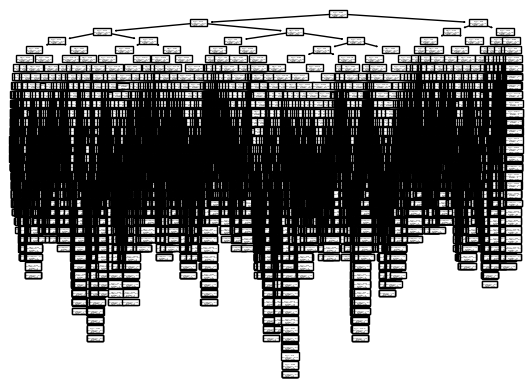

In [ ]:
plot_tree(decisionregressor)
plt.show()

In [ ]:
tree = DecisionTreeRegressor(random_state = 23, ccp_alpha = 0.003)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

r2_score(y_test, y_pred)

0.6622290321221345

### Poda da Árvore

O scikit-learn fornece um comando `cost_complexity_pruning_path`, o qual testa vários valores de `ccp_alpha`. O `ccp_alpha` controla a profundidade da árvore: quanto maior o valor dele, menor o número de nós da árvore. Ou seja, conforme `ccp_alpha` aumenta, a impureza dos nós da árvore também aumenta.


In [ ]:
tree = DecisionTreeRegressor(random_state = 23)

path = tree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

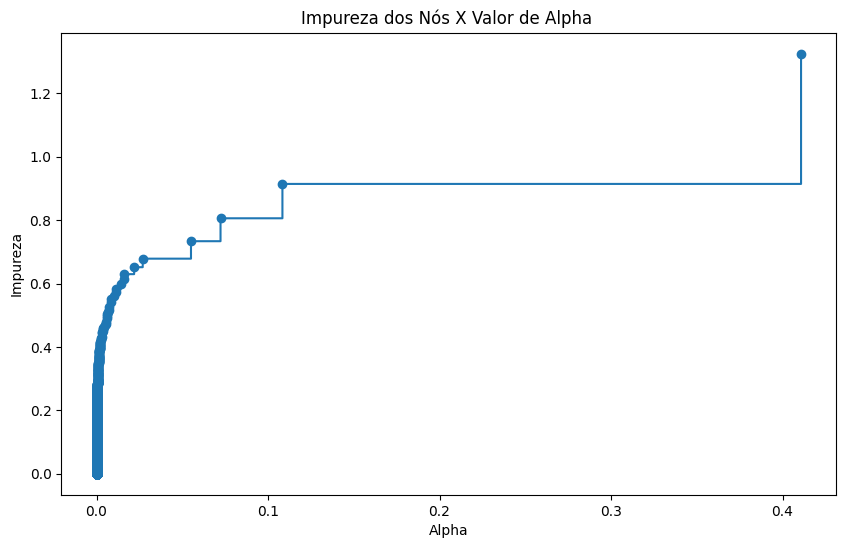

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.plot(ccp_alphas, impurities, marker = 'o', drawstyle = 'steps-post')
ax.set_title("Impureza dos Nós X Valor de Alpha ")
ax.set_xlabel('Alpha')
ax.set_ylabel('Impureza')
plt.show()

Agora que temos uma gama de possíveis valores de ccp_alpha, podemos testá-los no modelo. Mas perceba que a quantidade de valores de alphas é muito grande e testar cada um dos modelos levaria muito tempo!

Fiz um teste: ficou mais de 50 minutos e ainda não havia finalizado.

In [ ]:
len(ccp_alphas)

12984

In [ ]:
ccp_alphas = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2]

In [ ]:
modelos = []
r2s = []

r2_best = 0
alpha_best = 0

for ccp_alpha in ccp_alphas:
  # Chamando o comando e definindo seus parâmetros
  tree = DecisionTreeRegressor(random_state = 23, ccp_alpha = ccp_alpha)

  # Ajustando o modelo
  tree.fit(X_train, y_train)

  # Adicionando o modelo à lista modelos
  modelos.append(tree)

  r2_ = r2_score(y_true = y_test, y_pred = tree.predict(X_test))

  r2s.append(r2_)

  if r2_ > r2_best:
    r2_best = r2_
    alpha_best = ccp_alpha



In [ ]:
print(r2_best, alpha_best)

0.7121397127534932 0.001


O sklearn já traz um comando nativo que permite a visualização do modelo.

Documentação: [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

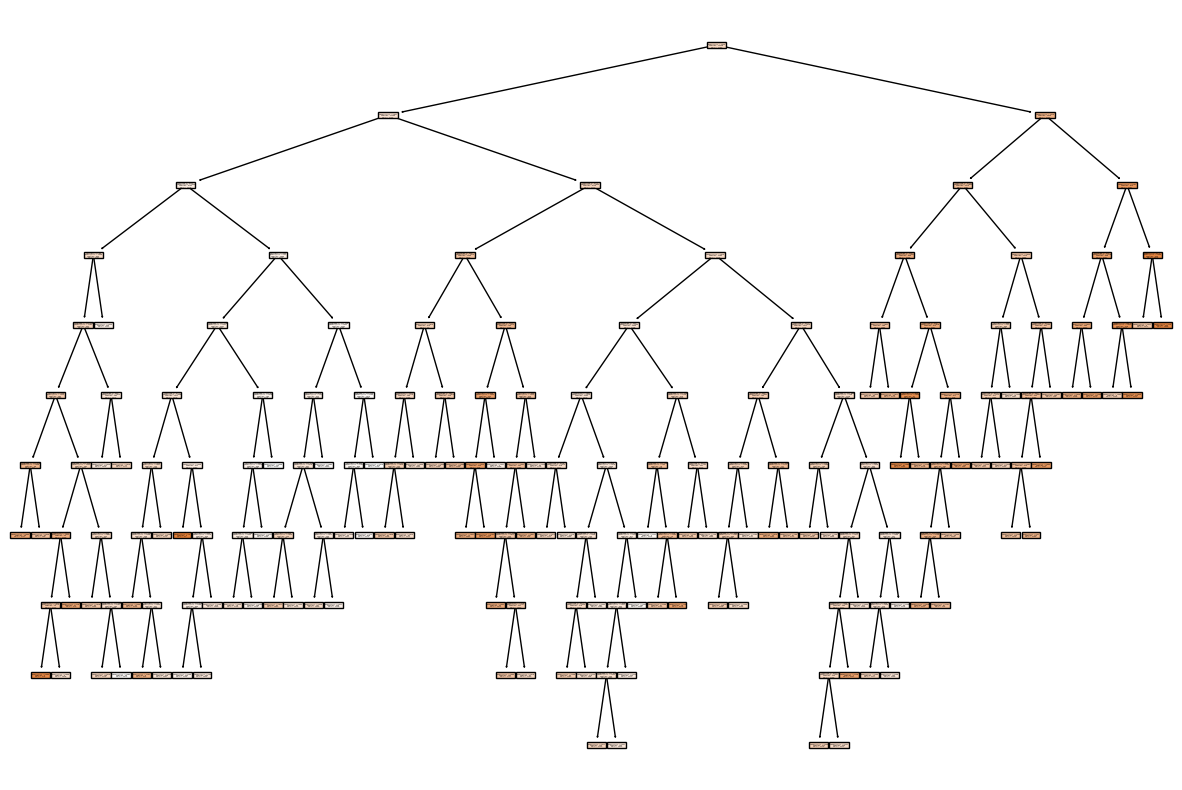

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))

ax = plot_tree(modelos[4], feature_names = housing.feature_names, filled = True)
plt.show()

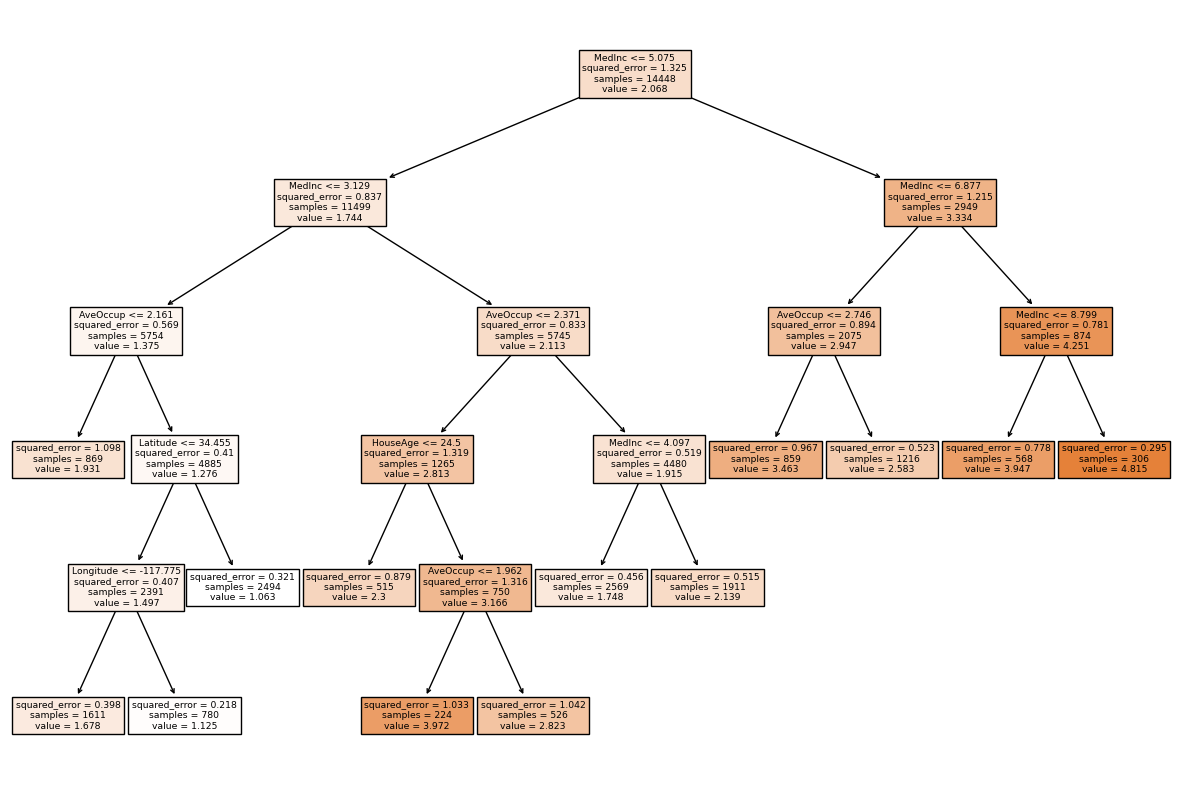

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))

ax = plot_tree(modelos[5], feature_names = housing.feature_names, filled = True)
plt.show()

Na afinação de parâmetros acima, já utilizamos uma abordagem de validação cruzada (treinamento e teste), mas - a fim de ter um embasamento maior - podemos utilizar K-Fold.

In [ ]:
cross_best = 0
cv_best = 0

for cv in range(2, 21, 1):
  # Chamando o comando e definindo seus parâmetros
  tree = DecisionTreeRegressor(random_state = 23, ccp_alpha = alpha_best)

  # Ajustando o modelo com K-Fold
  cross = cross_val_score(tree, X, y, cv = cv)

  if cross.mean() > cross_best:
    cross_best = cross.mean()
    cv_best = cv

print(cross_best, cv_best)

0.5337160407424214 5


## Bagging

De forma resumida, Bagging Regression funciona da seguinte forma:
1. São criados vários boostrapped data sets;
2. O modelo de árvore de decisão é ajustado para cada um deles;
3. A resposta é a média da resposta dos modelos.
  

Documentação: [`BaggingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor)

O comando BaggingRegressor pede que o atributo alvo, y, seja do formato (n_samples, ). Caso não esteja nesse formato, você receberá este aviso:

>  /usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

> return column_or_1d(y, warn=True)


In [ ]:
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [ ]:
bagging = BaggingRegressor(random_state = 23)

bagging.fit(X_train, y_train)

r2_score(y_test, bagging.predict(X_test))

0.7842308273302139

### Afinação de Parâmetros - Escolha do B ótimo

Diferentemente das árvores de decisões simples, no bagging não há poda de árvore. Em vez disso, há a escolha da quantidade B de bootstrapped data sets.

No código, a escolha desse parâmetro é feita por `n_estimators`, que tem como padrão $B = 10$. Podemos, então, testarmos diferentes valores de $B$ para encontrar o valor ótimo.

In [ ]:
Bs = [10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 150, 200]
modelos_bag = []

for B in Bs:
  # Definindo os parâmetros do modelo Bagging
  bagging = BaggingRegressor(n_estimators = B, random_state = 23, oob_score = True)

  # Ajustando o modelo
  bagging.fit(X_train, y_train)

  # Adicionando-o a uma lista
  modelos_bag.append(bagging)

bagging.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:1253: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:1253: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:1253: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:1253: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


BaggingRegressor(n_estimators=200, oob_score=True, random_state=23)

In [ ]:
oobs = []
r2s_bag = []
score_bag = []

for i in range(len(modelos_bag)):
  oobs.append(modelos_bag[i].oob_score_)
  r2s_bag.append(r2_score(y_true = y_test, y_pred = modelos_bag[i].predict(X_test)))
  score_bag.append(modelos_bag[i].score(X_train, y_train))


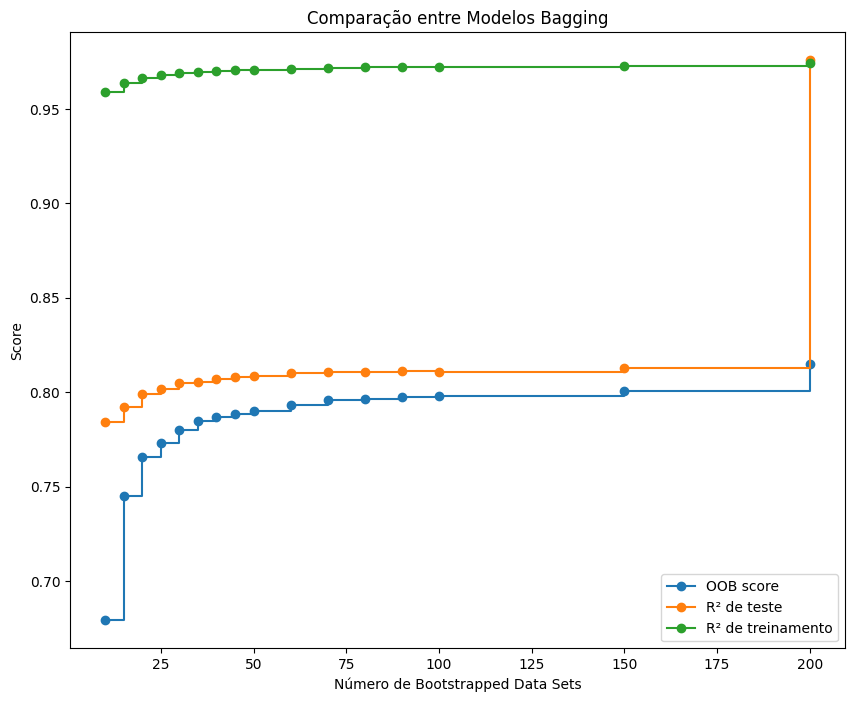

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))

ax.plot(Bs, oobs, marker = 'o', drawstyle = 'steps-post', label = 'OOB score')
ax.plot(Bs, r2s_bag, marker = 'o', drawstyle = 'steps-post', label = 'R² de teste')
ax.plot(Bs, score_bag, marker = 'o', drawstyle = 'steps-post', label = 'R² de treinamento')
ax.set_xlabel('Número de Bootstrapped Data Sets')
ax.set_ylabel('Score')
ax.set_title('Comparação entre Modelos Bagging')
ax.legend()

plt.show()

In [ ]:
r2s_bag

[0.7842308273302139,
 0.792084879019965,
 0.7991038465581239,
 0.8019044474669563,
 0.8050735717700565,
 0.8056696337030832,
 0.8067995952148983,
 0.808213810180923,
 0.8088880607297184,
 0.8099706186861386,
 0.8106426376338857,
 0.810546059125441,
 0.8111372857516018,
 0.8108199635372695,
 0.8130575580240674,
 0.9758017207008107]

O $R^2$ de teste do modelo Bagging com 200 árvores é surpreendente! Contudo, devemos verificar mais uma vez se esse desempenho é verídico. Uma forma de verificar é usando K-Fold Cross-Validation.

In [ ]:
bagging = BaggingRegressor(n_estimators = 200, random_state = 23)

cross_bags = cross_val_score(bagging, X, y)

cross_bags.mean()

0.6544559005872965

## Random Forest

Random Forests têm um funcionamento similar ao Bagging:

1. São criados vários boostrapped data sets;
2. O modelo de árvore de decisão é ajustado para cada um deles com apenas um subset dos preditores;
3. A resposta é a média da resposta dos modelos.

Documentação: [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [ ]:
rforest = RandomForestRegressor(random_state = 23)

rforest.fit(X_train, y_train)

r2_score(y_true = y_test, y_pred = rforest.predict(X_test))

0.8110278198180909

### Afinação de Parâmetros - Escolha do B ótimo

Assim como no Bagging, a escolha do parâmetro número de árvores bootstrapped é essencial para um bom funcionamento do modelo.

No código, a escolha desse parâmetro é feita por `n_estimators`, que tem como padrão $B = 100$. Podemos, então, testarmos diferentes valores de $B$ para encontrar o valor ótimo.

OBSERVAÇÃO:
> Tuning the n_estimators for RF generally results in a waste of computer power. In practice one just needs to ensure that it is large enough so that doubling its value does not lead to a significant improvement of the testing score (Amor, [*s.d*]).

Essa observação nos indica que a procura de um $B$ ótimo nem sempre vai ser necessária, desde que `n_estimators` seja grande o suficiente.

In [ ]:
n_Brfs = [50, 75, 100, 125, 150, 175, 200]

modelos_rf = []

r2s_rf = []

oobs_rf = []

score_rf = []


for n_Brf in n_Brfs:
  rforest = RandomForestRegressor(n_estimators = n_Brf, random_state = 23, oob_score = True)

  rforest.fit(X_train, y_train)

  modelos_rf.append(rforest)

  r2s_rf.append(r2_score(y_true = y_test, y_pred = rforest.predict(X_test)))

  oobs_rf.append(rforest.oob_score_)

  score_rf.append(rforest.score(X_train, y_train))

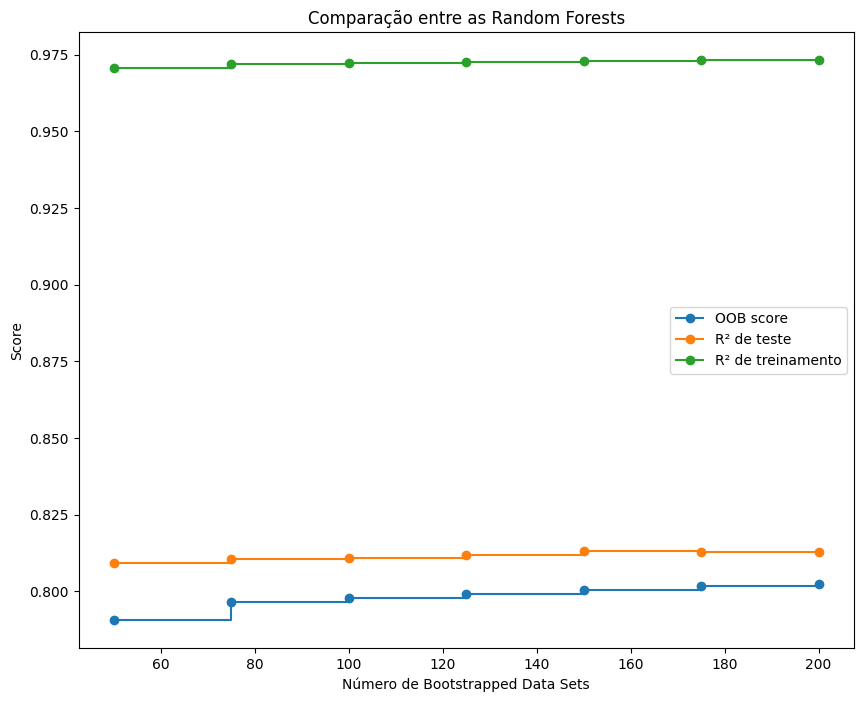

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))

ax.plot(n_Brfs, oobs_rf, marker = 'o', drawstyle = 'steps-post', label = 'OOB score')
ax.plot(n_Brfs, r2s_rf, marker = 'o', drawstyle = 'steps-post', label = 'R² de teste')
ax.plot(n_Brfs, score_rf, marker = 'o', drawstyle = 'steps-post', label = 'R² de treinamento')
ax.set_xlabel('Número de Bootstrapped Data Sets')
ax.set_ylabel('Score')
ax.set_title('Comparação entre as Random Forests')
ax.legend()

plt.show()

In [ ]:
r2s_rf

[0.8092129294445682,
 0.8107434469296616,
 0.8110278198180909,
 0.8118610296243164,
 0.8131573038566584,
 0.8128679343048902,
 0.8128577161852593]

### Afinação de Parâmetros - Escolha do max_features ótimo

A função `RandomForestRegressor` do Scikit-Learn deixa como *default* em `max_features` o número $1.0$. Isso significa que o número de atributos que podem ser escolhidos em cada divisão é igual ao número de atributos total, tornando uma Random Forest em um Bagging.

Podemos, então, afinar esse parâmetro para atingir resultados melhores.



> The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3.



In [ ]:
max_features = [0.3, 'sqrt', 1.0]

modelos_rf_2 = []

r2s_rf_2 = []

oobs_rf_2 = []

score_rf_2 = []


for max_feature in max_features:
  rforest = RandomForestRegressor(n_estimators = 150, random_state = 23, oob_score = True, max_features = max_feature)

  rforest.fit(X_train, y_train)

  modelos_rf_2.append(rforest)

  r2s_rf_2.append(r2_score(y_true = y_test, y_pred = rforest.predict(X_test)))

  oobs_rf_2.append(rforest.oob_score_)

  score_rf_2.append(rforest.score(X_train, y_train))

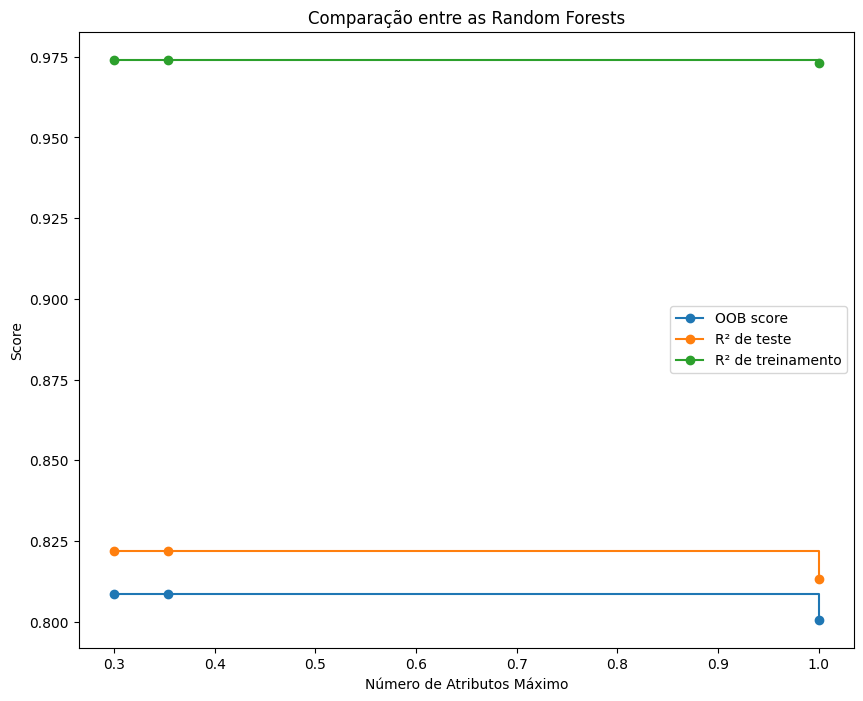

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))

ax.plot([0.3, 0.3535533906, 1.0], oobs_rf_2, marker = 'o', drawstyle = 'steps-post', label = 'OOB score')
ax.plot([0.3, 0.3535533906, 1.0], r2s_rf_2, marker = 'o', drawstyle = 'steps-post', label = 'R² de teste')
ax.plot([0.3, 0.3535533906, 1.0], score_rf_2, marker = 'o', drawstyle = 'steps-post', label = 'R² de treinamento')
ax.set_xlabel('Número de Atributos Máximo')
ax.set_ylabel('Score')
ax.set_title('Comparação entre as Random Forests')
ax.legend()

plt.show()

In [ ]:
r2s_rf_2

[0.8219800487248968, 0.8219800487248968, 0.8131573038566584]

## Boosting

O Scikit-Learn oferece duas funções para Boosting Regression (para classificação é a mesma coisa): `GradientBoostingRegressor` e `HistGradientBoostingRegressor`. Qual a diferença entre elas?

A diferença é o uso indicado: para data sets com mais de $10.000$ observações, é recomendado usar o `HistGradientBoostingRegressor`, uma vez que ele é muito mais eficiente computacionalmente.

Portanto, como nosso data set tem mais de $20.000$ observações, usaremos o `HistGradientBoostingRegressor`.

Documentação: [`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)

Documentação: [`HistGradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor)

In [ ]:
hgbr = HistGradientBoostingRegressor(random_state = 23)

hgbr.fit(X_train, y_train)

r2_score(y_true = y_test, y_pred = hgbr.predict(X_test))

0.840412726588348

In [ ]:
hgbr = HistGradientBoostingRegressor(random_state = 23, validation_fraction=0.1,
    n_iter_no_change=10)

hgbr.fit(X_train, y_train)

r2_score(y_true = y_test, y_pred = hgbr.predict(X_test))

0.840412726588348

In [ ]:
hgbr.score(X_train, y_train)

0.8806192437900482

## Comparação entre os métodos de Árvore

Irei comparar o $R^2$ de teste dos melhores modelos de Árvore de Regressão, Bagging, Random Forest e Boosting

In [ ]:
dicionario = {
    'decision_tree': 0.7121397127534932,
    'bagging': 0.8130575580240674,
    'random_forest': 0.8219800487248968,
    'boosting': 0.840412726588348
}

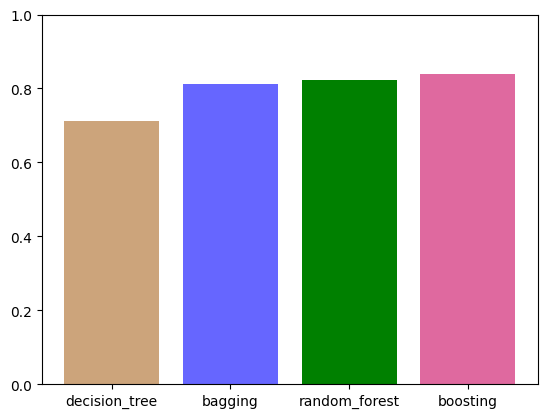

In [ ]:
fig, ax = plt.subplots()

ax.bar(range(len(dicionario)), list(dicionario.values()), align = 'center', color = ['#cca47b', '#6666ff', '#008000', '#df699f'])
ax.set_xticks(range(len(dicionario)), list(dicionario.keys()))
ax.set_ylim([0, 1])

plt.show()

# Referências

DECISION Trees. **Scikit-Learn**, [*s.d*]. Disponível em [Decision Trees](https://scikit-learn.org/stable/modules/tree.html). Acesso em 03 jun. 2024.

ENSEMBLES: Gradient boosting, random forests, bagging, voting, stacking. **Scikit-Learn**, [*s.d*]. Disponível em [Ensembles](https://scikit-learn.org/stable/modules/ensemble.html). Acesso em 04 jun. 2024.

AMOR, Arturo. Comparing Random Forests and Histogram Gradient Boosting models. **Scikit-Learn**, [*s.d*]. Disponível em [Comparing Random Forests and Histogram Gradient Boosting models](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_hist_grad_boosting_comparison.html#sphx-glr-auto-examples-ensemble-plot-forest-hist-grad-boosting-comparison-py). Acesso em 05 jun. 2024.

HO, Kian; *et al*. OOB Errors for Random Forests. **Scikit-Learn**, [*s.d*]. Disponível em [OOB Errors for Random Forests](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html). Acesso em 05 jun. 2024.

FEATURE importances with a forest of trees. **Scikit-Learn**, [*s.d*]. Disponível em [Feature importances with a forest of trees](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html). Acesso em 05 jun. 2024.

PRETTENHOFER, Peter; et al. Gradient Boosting regression. Scikit-Learn, [*s.d*]. Disponível em [Gradient Boosting regression](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html). Acesso em 05 jun. 2024.

AMOR, Arturo. Features in Histogram Gradient Boosting Trees. **Scikit-Learn**, [*s.d*]. Disponível em [Features in Histogram Gradient Boosting Trees](https://scikit-learn.org/stable/auto_examples/ensemble/plot_hgbt_regression.html#sphx-glr-auto-examples-ensemble-plot-hgbt-regression-py). Acesso em 05 jun. 2024.

HOW to Tune Hyperparameters in Gradient Boosting Algorithm. **Geeks for Geeks**, 2024. Disponível em [How to Tune Hyperparameters in Gradient Boosting Algorithm](https://www.geeksforgeeks.org/how-to-tune-hyperparameters-in-gradient-boosting-algorithm/). Acesso em 05 jun. 2024.

Early stopping in Gradient Boosting. **Scikit-Learn**, [*s.d*]. Disponível em [Early stopping in Gradient Boosting](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_early_stopping.html). Acesso em 05 jun. 2024